## **A NetworkX Tutorial Depicting Connectivity in 6 Graphs Models**

by Hong Qu at [Computation + Journalism Conference 2022](https://cj2022.brown.columbia.edu/)

**Graph models:**
1.   Star
2.   Path
1.   Small World
2.   Small World Rewired
1.   Random
2.   Scale Free

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

## How many nodes do you want in these graph?
Drag the slider to choose a number between 5 - 500:

In [ ]:
n = 20 #@param {type:"slider", min:5, max:500, step:5}

In [ ]:
#Don't need to edit these values 
#Unless you want to experiment with small world graph rewiring probability (p_small_world_rewire)
#or change the random graph edge density using the probably of edge formation (p_random_link)
p_small_world_rewire = .2
p_random_link = .2

**Generating 6 types of network models:**

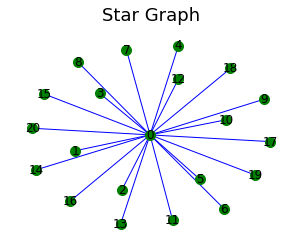

In [ ]:
G_star = nx.star_graph(n)
plt.figure(figsize=(4, 3))
nx.draw(G_star, edge_color='blue', node_size=100, node_color='green', with_labels = True)
plt.title('Star Graph', size=18)
plt.show()

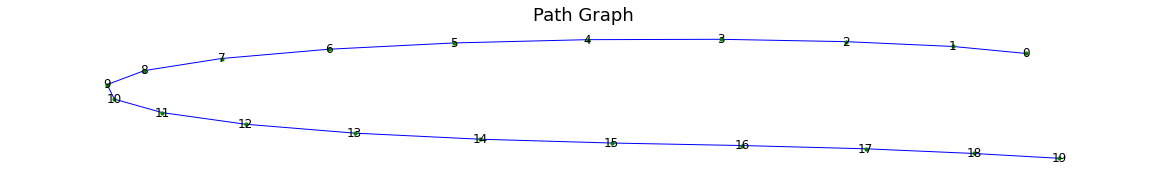

In [ ]:
G_path = nx.path_graph(n, create_using=None)
plt.figure(figsize=(16, 2))
nx.draw(G_path, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Path Graph', size=18)
plt.show()

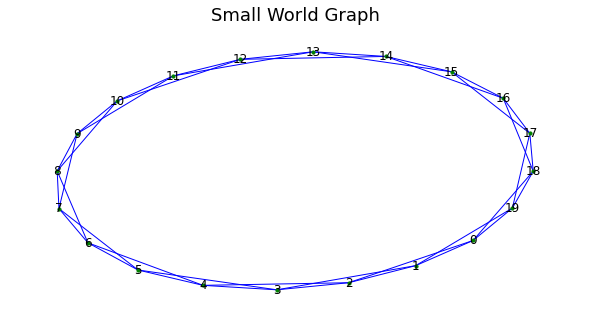

In [ ]:
G_small_world = nx.watts_strogatz_graph(n, 4, 0, seed=None)
plt.figure(figsize=(8, 4))
nx.draw(G_small_world, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Small World Graph', size=18)
plt.show()

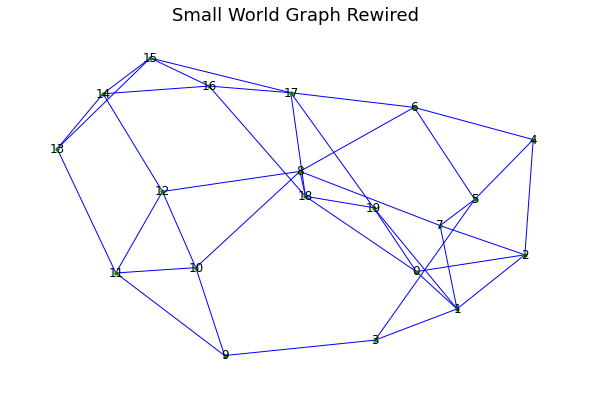

In [ ]:
G_small_world_rewired = nx.watts_strogatz_graph(n, 4, p_small_world_rewire, seed=None)
plt.figure(figsize=(8, 5))
nx.draw(G_small_world_rewired, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Small World Graph Rewired', size=18)
plt.show()

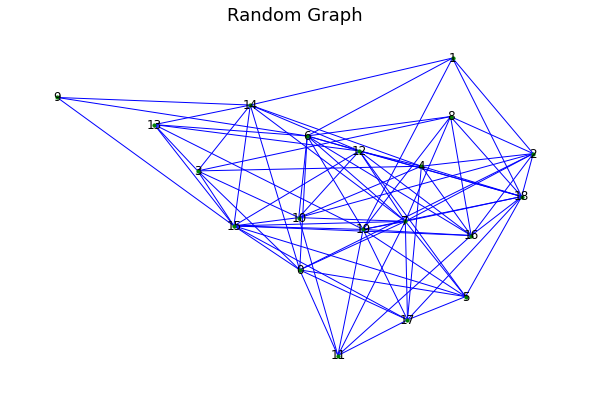

In [ ]:
if n>20:
  p_random_link = .1 - p_random_link/n
else:
  p_random_link = p_random_link + .2
G_random = nx.erdos_renyi_graph(n, p_random_link, seed=None, directed=False)
plt.figure(figsize=(8, 5))
nx.draw(G_random, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Random Graph', size=18)
plt.show()

In [ ]:
p_random_link

0.4

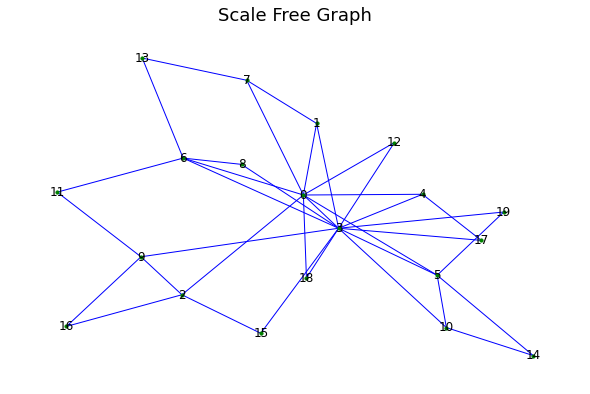

In [ ]:
G_scale_free = nx.barabasi_albert_graph(n, 2)
plt.figure(figsize=(8, 5))
nx.draw(G_scale_free, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Scale Free Graph', size=18)
plt.show()

## **Let's compare the 6 graphs' properties**

*   diameter
*   average
*   clustering

In [ ]:
diameter_star = nx.diameter(G_star)
diameter_path = nx.diameter(G_path)
diameter_small_world = nx.diameter(G_small_world)
diameter_small_world_rewired = nx.diameter(G_small_world_rewired)
if nx.is_connected(G_random):
  diameter_random = nx.diameter(G_random)
else:
  diameter_random = "Graph is disconnected!"
diameter_scale_free = nx.diameter(G_scale_free)

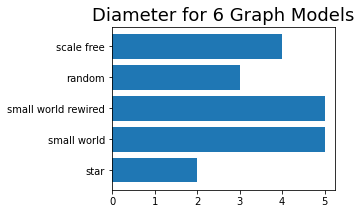

In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.title('Diameter for 6 Graph Models', size=18)
graph_models = ["star","small world","small world rewired","random","scale free"]
diameter_values = [diameter_star,diameter_small_world,diameter_small_world_rewired,diameter_random,diameter_scale_free]
plt.barh(graph_models,diameter_values)
plt.show()

In [ ]:
avg_path_star = nx.average_shortest_path_length(G_star)
avg_path_path = nx.average_shortest_path_length(G_path)
avg_path_small_world = nx.average_shortest_path_length(G_small_world)
avg_path_small_world_rewired = nx.average_shortest_path_length(G_small_world_rewired)
if nx.is_connected(G_random):
  avg_path_random = nx.average_shortest_path_length(G_random)
else:
  avg_path_random = "Graph is disconnected!"
avg_path_scale_free = nx.average_shortest_path_length(G_scale_free)

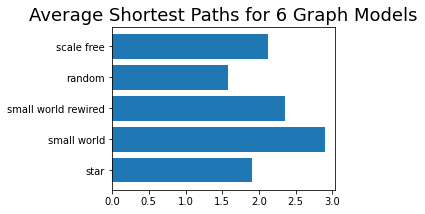

In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.title('Average Shortest Paths for 6 Graph Models', size=18)
graph_models = ["star","small world","small world rewired","random","scale free"]
avg_path_values = [avg_path_star,avg_path_small_world,avg_path_small_world_rewired,avg_path_random,avg_path_scale_free]
plt.barh(graph_models,avg_path_values)
plt.show()

In [ ]:
clustering_star = nx.average_clustering(G_star)
clustering_path = nx.average_clustering(G_path)
clustering_small_world = nx.average_clustering(G_small_world)
clustering_small_world_rewired = nx.average_clustering(G_small_world_rewired)
clustering_random = nx.average_clustering(G_random)
clustering_scale_free = nx.average_clustering(G_scale_free)

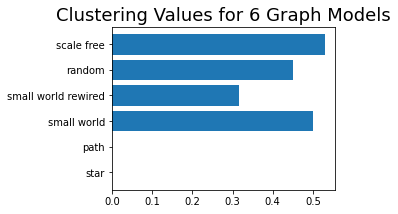

In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.title('Clustering Values for 6 Graph Models', size=18)
graph_models = ["star","path","small world","small world rewired","random","scale free"]
clustering_values = [clustering_star,clustering_path,clustering_small_world,clustering_small_world_rewired,clustering_random,clustering_scale_free]
plt.barh(graph_models,clustering_values)
plt.show()

### **Let's analyze which nodes have the most edges (highest degree)**

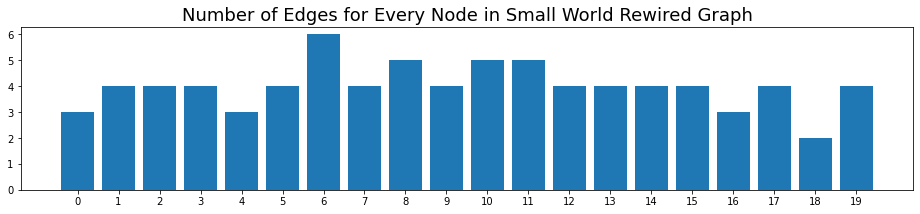

In [ ]:
degrees = [val for (node, val) in G_small_world_rewired.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Every Node in Small World Rewired Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

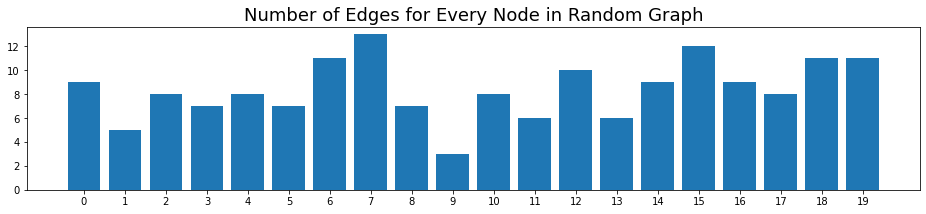

In [ ]:
degrees = [val for (node, val) in G_random.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Each Node in Random Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

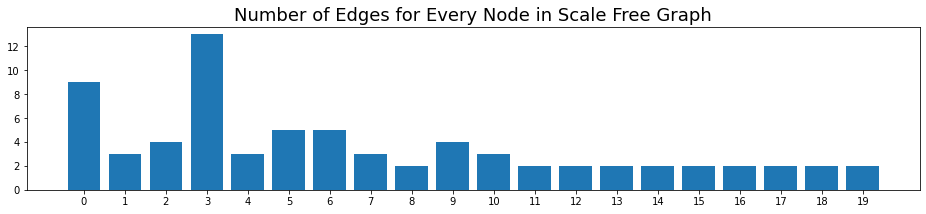

In [ ]:
degrees = [val for (node, val) in G_scale_free.degree()]
fig = plt.figure(figsize=(16, 3))
plt.title('Number of Edges for Each Node in Scale Free Graph', size=18)
x = list(range(0,n))
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
y = degrees
plt.bar(x,y)
plt.show()

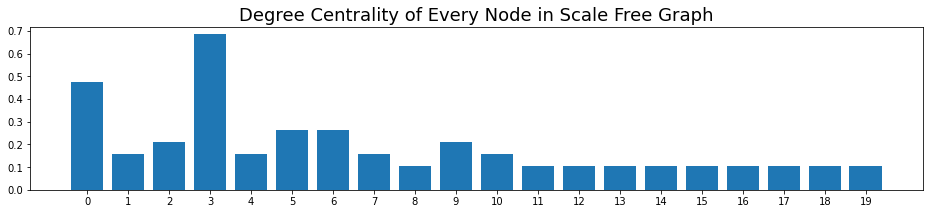

In [ ]:
centrality_dict = nx.degree_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Degree Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(centrality_dict)), list(centrality_dict.values()))
plt.xticks(range(len(centrality_dict)), list(centrality_dict.keys()))
plt.show()

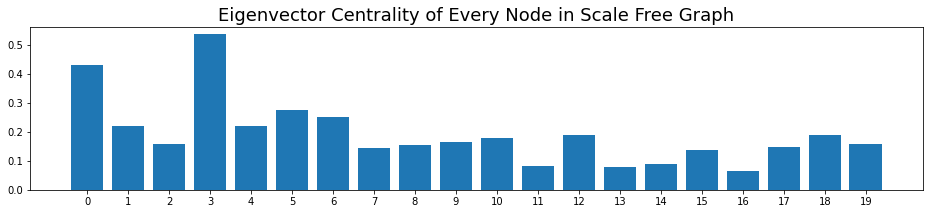

In [ ]:
eigenvector_centrality_dict = nx.eigenvector_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Eigenvector Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(eigenvector_centrality_dict)), list(eigenvector_centrality_dict.values()))
plt.xticks(range(len(eigenvector_centrality_dict)), list(eigenvector_centrality_dict.keys()))
plt.show()

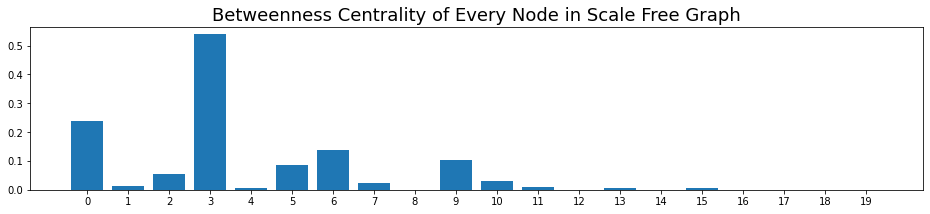

In [ ]:
betweenness_centrality_dict = nx.betweenness_centrality(G_scale_free)
fig = plt.figure(figsize=(16, 3))
plt.title('Betweenness Centrality of Each Node in Scale Free Graph', size=18)
plt.bar(range(len(betweenness_centrality_dict)), list(betweenness_centrality_dict.values()))
plt.xticks(range(len(betweenness_centrality_dict)), list(betweenness_centrality_dict.keys()))
plt.show()

## **Exporting the data (edge list)**

In [ ]:
nx.write_edgelist(G_scale_free, "G_scale_free_edgelist.csv", data=False)

## **Importing the data from CSV file**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hqu/networkx_demo/main/CplusJ2022/G_scale_free_edgelist_import.csv')

In [ ]:
df1 = df[['Source','Target']]
df1.head()

,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [ ]:
G_imported = nx.from_pandas_edgelist(df1, 'Source','Target')

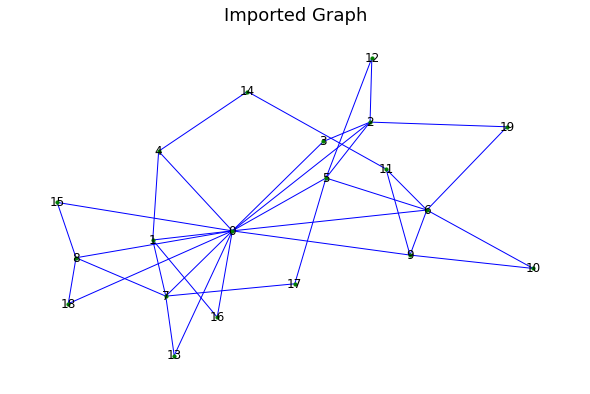

In [ ]:
plt.figure(figsize=(8, 5))
nx.draw(G_imported, edge_color='blue', node_size=10, node_color='green', with_labels = True)
plt.title('Imported Graph', size=18)
plt.show()

# **End of tutorial**



"***In Ersilia, to establish the relationships that sustain the city's life, the inhabitants stretch strings from the corners of the houses, white or black or gray or black-and-white according to whether they mark a relationship of blood, of trade, authority, agency.***" 

From Italo Calvino’s *Invisible Cities*

https://lithub.com/art-inspired-by-italo-calvinos-invisible-cities/


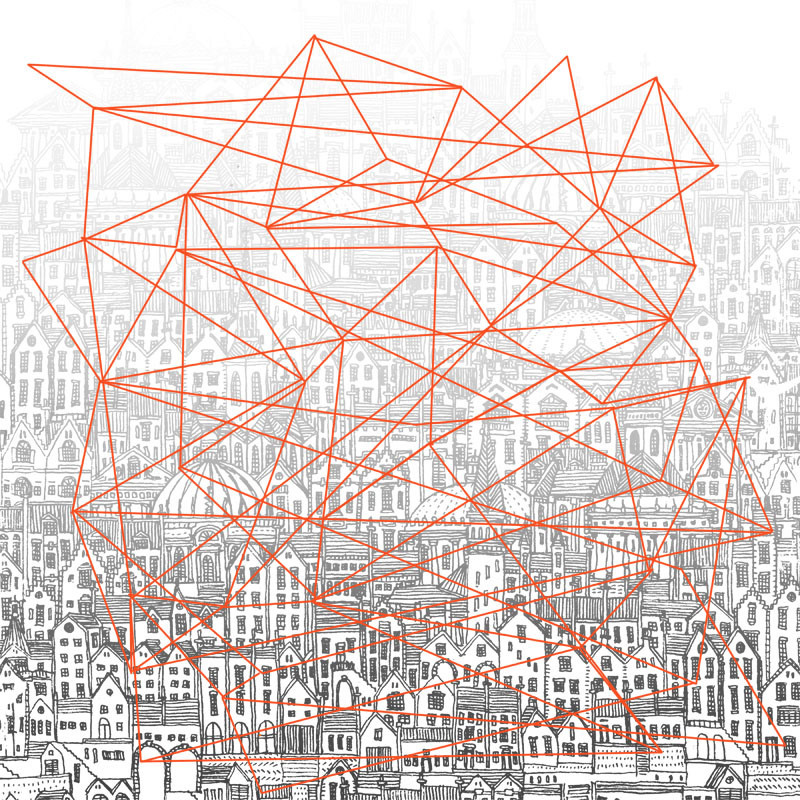

